In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "Life-Expectancy-Data-Updated.csv"  # Replace with the actual file path

life_expectancy_df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "lashagoch/life-expectancy-who-updated",
    file_path,
    pandas_kwargs={'encoding': 'ISO-8859-1'}  # Or use 'latin1' if needed
)

C:\Users\krist\AppData\Local\Temp\ipykernel_9952\2468902236.py:6: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  life_expectancy_df = kagglehub.load_dataset(


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print(f'Rows: {life_expectancy_df.shape[0]}\nColumns: {life_expectancy_df.shape[1]}')
life_expectancy_df.head()

Rows: 2864
Columns: 21


,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [4]:
missing_df = pd.DataFrame({
    "column_name": life_expectancy_df.isna().sum().keys(),
    "number_missing_values": life_expectancy_df.isna().sum().values
})

missing_df

,column_name,number_missing_values
0,Country,0
1,Region,0
2,Year,0
3,Infant_deaths,0
4,Under_five_deaths,0
5,Adult_mortality,0
6,Alcohol_consumption,0
7,Hepatitis_B,0
8,Measles,0
9,BMI,0


In [5]:
life_expectancy_df.describe(include='all')

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864,2864,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,...,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
unique,179,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Turkiye,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,...,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,NaN,NaN,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,...,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,NaN,NaN,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,...,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,NaN,NaN,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,...,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,NaN,NaN,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,...,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,NaN,NaN,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,...,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000


In [6]:
data_types_df = pd.DataFrame({
    "column_name": life_expectancy_df.dtypes.index,
    "data_type": life_expectancy_df.dtypes.values
})

data_types_df


,column_name,data_type
0,Country,object
1,Region,object
2,Year,int64
3,Infant_deaths,float64
4,Under_five_deaths,float64
5,Adult_mortality,float64
6,Alcohol_consumption,float64
7,Hepatitis_B,int64
8,Measles,int64
9,BMI,float64


In [7]:
life_expectancy_df['Economy_status_Developed'] = life_expectancy_df['Economy_status_Developed'].astype('bool')
life_expectancy_df['Economy_status_Developing'] = life_expectancy_df['Economy_status_Developing'].astype('bool')

In [8]:
print(life_expectancy_df['Country'].dtype)


object


In [9]:
# Initialize an empty list to store the results
country_occurences = []

for country in life_expectancy_df['Country'].unique():
    count = life_expectancy_df[life_expectancy_df['Country'] == country].shape[0]
    country_occurences.append({"country": country, "occurences": count})
    
country_occurences_df = pd.DataFrame(country_occurences)

# Check if all countries appear 16 times
if (country_occurences_df['occurences'] != 16).any():
    print(country_occurences_df)  # Print the DataFrame if any country doesn't appear 16 times
else:
    print("All countries appear 16 times")

All countries appear 16 times


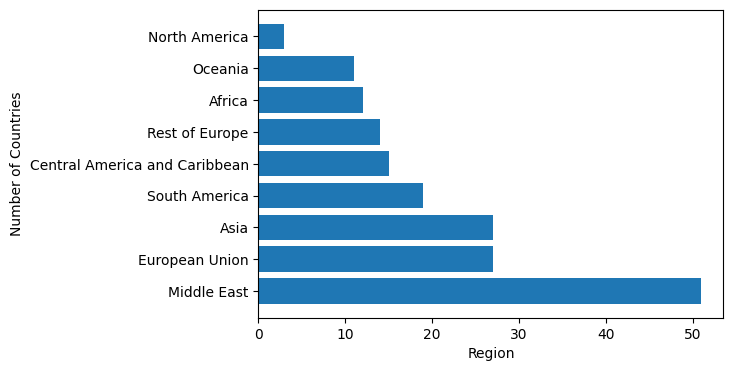

In [35]:
regions = life_expectancy_df['Region'].unique()
region_counts = (life_expectancy_df['Region'].value_counts() / country_occurences_df['occurences'].unique().astype('int32')).astype('int32')

plt.figure(figsize=(6,4))
ax = plt.subplot()

plt.barh(regions, region_counts)
plt.xlabel("Region")
plt.ylabel("Number of Countries")

plt.show()

In [36]:
life_expectancy_df

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.320,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,False,True,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.350,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,True,False,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.570,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,False,True,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.680,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,False,True,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.890,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,True,False,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Niger,Africa,2000,97.0,224.9,291.8240,0.092,72,64,20.8,...,34,0.49,399,11.33,12.8,12.9,1.1,False,True,49.9
2860,Mongolia,Asia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,...,95,0.02,2515,2.67,2.2,2.3,9.1,False,True,66.9
2861,Sri Lanka,Asia,2004,17.7,28.9,134.8950,1.560,62,95,21.9,...,97,0.02,2130,19.39,15.4,15.5,10.3,False,True,74.3
2862,Lithuania,European Union,2002,7.9,9.9,204.0120,11.000,94,95,26.1,...,95,0.05,7424,3.44,3.3,3.3,11.1,True,False,71.8
